# K-Nearest Neighbour

## Import libraries

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from time import sleep

## What is kNN?
**k-Nearest Neighbour** is an *Unsupervised Learning* algorithm. According to Wikipedia, it is defined as,


*In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space.*

The kNN algorithm assumes that similar data points exust in *close proximity*. This means that their exist clusters of data in the hyper space they are plotted in. This effect can also be seen in daily life. In our cities, we see that similar shops are often present very close to each other, like the fast food joints.

The idea of the **kNN** algorithm is to define cluster's depending on the proximity of the data points to a specific point called as `centroid` or `cluster centroid` as shown in the below image,

<img src="./imgs/knnimg.jpg" />

### Load Dataset and Plot
Let's load an example dataset to understand how knn works.

In [2]:
# Load dataset in variable X 
data = loadmat("KNNExample.mat")
X = data['X']

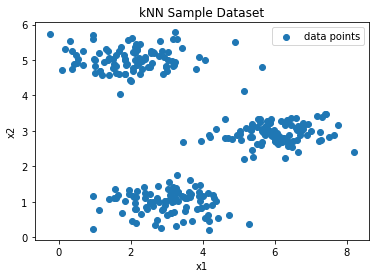

In [3]:
# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], label = "data points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("kNN Sample Dataset")
plt.legend()

From the plot, we can see that their are 3 different cluster's in our dataset, these correspond to different classes, a data point can belong to.

### kNN steps
Their are 3 steps in the kNN algorithm, These are :-

#### Initiaization
In this step, first we decide how many centroids aka classes are their in our dataset, This can be done heuritically or by Exploratory data analysis. In our case, we have found how many centroids are their by plotting the data points.

Next, we have to initialize the centroid points. There are 2 ways to do so,
1. **Random initialization** : We can randomly choose any point using a random generator or by hand in our data point range.
2. **Random Data Point Selection** : We can use an existing data point in our dataset as initial centroid point.


We are using the first way of initializing 

In [4]:
NUM_CENTROIDS = 3

centroids = np.array([[1, 1],
                     [2, 2],
                     [3, 3]])

"""
centroid_idx = np.random.randint(X.shape[0], size = NUM_CENTROIDS)

centroids = X[centroid_idx]
"""
print("Centroid Coordinates : ")
print(centroids)

Centroid Coordinates : 
[[1 1]
 [2 2]
 [3 3]]


#### Centroid Assignment
The next step is to assign data points to one of the centroids we have initialized, this is done as follows :
- calculate distance of each data point from each centroid using euclidean distance formula
- Select the centroid with the lowest distance from the data point

In [5]:
def centroid_assignment(num_centroids, centroids):
    distances_from_centroids = []

    for i in range(num_centroids):
        t = np.sum((X - centroids[i]) ** 2, axis = 1)
        distances_from_centroids.append(np.sqrt(t))

    distances_from_centroids = np.vstack(distances_from_centroids).T

    assignment = np.argmin(distances_from_centroids, axis = 1)
    
    return assignment

### Centroid Calculation
After we have assigned each data point to a centroid, now we are going to calculate new centroid based on the assigned data points. This is done as:

- find the mean of data points assigned to a centroid and set that mean as the new centroid

In [6]:
def calculate_new_centroid(num_centroids, centroids, assigned_points, dataset):
    for i in range(NUM_CENTROIDS):
        centroids[i] = np.mean(dataset[assigned_points[i]], axis = 0)
        
    return centroids

### Run kNN
So, the whole algorithm is as follows,
1. Initialize number of centroids and centroid points
2. Repeat until convergence i.e. when centroids stop changing
3. Perform Centroid Assigment
4. Calculate New centroid points

Let's run the algorithm!!

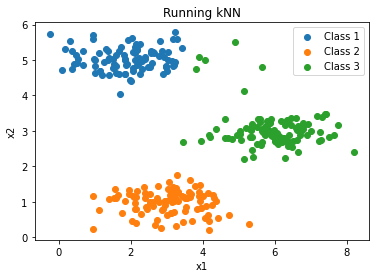

In [7]:
# For plotting
fig = plt.figure()
ax = fig.add_subplot(111)
fig.canvas.draw()

# Training loop
NUM_ITERS = 10
for i in range(NUM_ITERS):
    # Run centroid Assignment
    classes = []
    assigned = centroid_assignment(NUM_CENTROIDS, centroids)

    # Find data points corresponding to each cluster
    for i in range(NUM_CENTROIDS):
        classes.append(np.where(assigned == i)[0])

    # Run Centroid Calculation
    centroids = calculate_new_centroid(NUM_CENTROIDS, centroids, classes, X)
    
    # Plot
    ax.clear()
    for i in range(NUM_CENTROIDS):
        ax.scatter(X[classes[i], 0], X[classes[i], 1], label = "Class {}".format(i + 1))
    
    plt.legend()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Running kNN")
    fig.canvas.draw()
    sleep(0.5)

# References
- kNN: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm